<a href="https://colab.research.google.com/github/cscadel31/Churn-Classification--FGA-Digital-Talent-Scholarship/blob/main/%5BDS6_10%5D_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHALLENGE CHAPTER 2: CUSTOMER CHURN PREDICTION**

Authors:
Victor Hutapea

## **Data Understanding**

### Load Dataset

importing package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('Data Train.csv')

### Data Overwiew

In [ ]:
data.columns # menampilkan nama setiap kolom

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
data.shape #melihat banyak data dan kolom

(4250, 20)

In [ ]:
data.info() #melihat komposisi data setiap fitur yang ada pada dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Kolom data terakhir, Churn, adalah variabel target. Bentuknya biner: True menunjukkan bahwa perusahaan pada akhirnya kehilangan pelanggan, dan False menunjukkan bahwa pelanggan tersebut tetap dipertahankan

In [ ]:
data.head() #menampilkan 5 data teratas

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## **Exploratory Data Analyst (EDA)**

In [ ]:
data.duplicated().sum() #melakukan pengecekan duplokasi data

0

tahap selanjutnya adalah melihat nilai null dan unique pada data

In [ ]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype,
                      data[col].isna().sum(),
                      round(100*data[col].isna().sum()/len(data[col]), 2),
                      data[col].nunique(),
                      data[col].unique()[:10]])

data_desc = pd.DataFrame(data=list_item, columns='feature, datatype, null_values, null_percentage, unique_values, unique_sample'.split(","))
data_desc

,feature,datatype,null_values,null_percentage,unique_values,unique_sample
0,state,object,0,0.0,51,"[OH, NJ, OK, MA, MO, LA, WV, IN, RI, IA]"
1,account_length,int64,0,0.0,215,"[107, 137, 84, 75, 121, 147, 117, 141, 65, 74]"
2,area_code,object,0,0.0,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,0,0.0,2,"[no, yes]"
4,voice_mail_plan,object,0,0.0,2,"[yes, no]"
5,number_vmail_messages,int64,0,0.0,46,"[26, 0, 24, 37, 27, 33, 39, 25, 30, 41]"
6,total_day_minutes,float64,0,0.0,1843,"[161.6, 243.4, 299.4, 166.7, 218.2, 157.0, 184..."
7,total_day_calls,int64,0,0.0,120,"[123, 114, 71, 113, 88, 79, 97, 84, 137, 127]"
8,total_day_charge,float64,0,0.0,1843,"[27.47, 41.38, 50.9, 28.34, 37.09, 26.69, 31.3..."
9,total_eve_minutes,float64,0,0.0,1773,"[195.5, 121.2, 61.9, 148.3, 348.5, 103.1, 351...."


Dari hasil di atas dapat dilihat bahwa tidak ada data yang duplikat dan data yang null

### Fitur Numerikal

In [ ]:
numeric = []
for col in data.columns:
  if data[col].dtype != object:
    numeric.append(col)

print(numeric)
print(f'Total Fitur Numerik :{len(numeric)}')

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
Total Fitur Numerik :15


Terdapat 15 numerical data pada dataFrame

### Fitur Kategorikal

In [ ]:
categorical = []
for col in data.columns:
  if data[col].dtype == object:
    categorical.append(col)

print(categorical)
print(f'Total Fitur Kategorikal :{len(categorical)}')

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
Total Fitur Kategorikal :5


**Key takeaways :**
- Dataset terdiri dari 4250 baris dan 20 fitur (15 fitur numerikal dan 5 fitur kategorikal)
- Dataset tidak memiliki null/missing value
- Dataset tidak memiliki baris yang duplikat

## **Visualisasi Data**

## Univariate Analyst

### Fitur Numerikal

#### **FITUR ACCOUNT LENGTH**


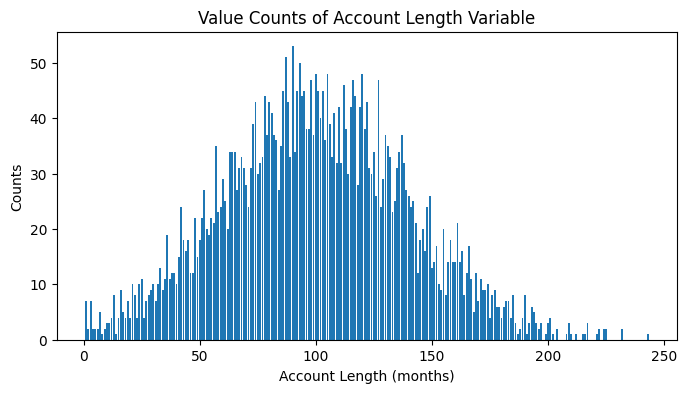

In [ ]:
fig = plt.figure(figsize=(8,4))                                         # configure figure size
plt.bar(x=data['account_length'].value_counts().keys(),                 # configure x axis = unique values of account length
            height=data['account_length'].value_counts().values)        # configure y axis = counts of said unique values
plt.xlabel('Account Length (months)')
plt.ylabel('Counts')
plt.title('Value Counts of Account Length Variable')
plt.show()

*Bar plot* tersebut menunjukkan bahwa mayoritas customers ternyata berlangganan ke layanan ISP ini cukup lama (~100 bulan, 8 tahun).

#### **FITUR NUMBER OF VOICE EMAIL**

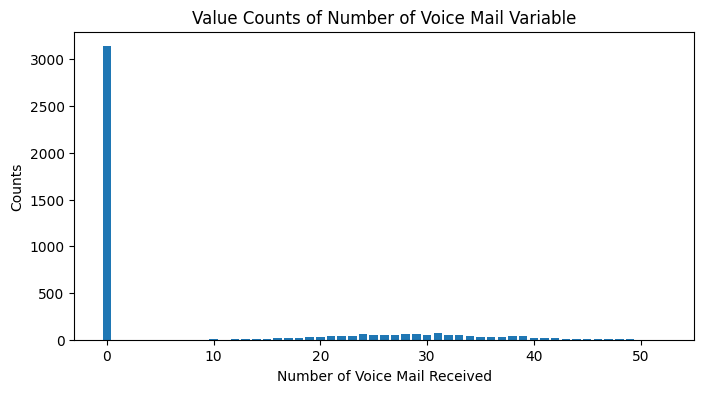

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.bar(x=data['number_vmail_messages'].value_counts().keys(),
            height=data['number_vmail_messages'].value_counts().values)
plt.xlabel('Number of Voice Mail Received')
plt.ylabel('Counts')
plt.title('Value Counts of Number of Voice Mail Variable')
plt.show()

Ada banyak customer yang memiliki number_vmail_messages=0 dengan 3138 orang di antaranya tidak berlangganan layanan voice mail. Ini berarti number_vmail_messages dan voice_mail_plan bersifat ***colinear***, sehingga harus dipertimbangkan dalam pemilhan model ML. Apakah kolom ini bisa di-drop/tidak bisa diputuskan setelah dilihat nilai korelasinya dengan voice_mail_plan menggunakan Pearson's correlation.

In [ ]:
df_temp = data.loc[:,['number_vmail_messages','voice_mail_plan']]
df_temp['voice_mail_plan'] = df_temp['voice_mail_plan'].apply(lambda x: 0 if x=='no' else 1)
corr_mtx = df_temp.corr()
corr_mtx

,number_vmail_messages,voice_mail_plan
number_vmail_messages,1.000000,0.954014
voice_mail_plan,0.954014,1.000000


Karena nilai korelasinya terlihat sangat tinggi, maka bisa disimpulkan kolom number_vmail_messages bisa di-drop pada proses cleaning.

#### **FITUR DAY CALLS**

Pada dataset, ada 3 variabel yang merepresentasikan aktivitas *day calls* tiap pengguna, yaitu `total_day_minutes`, `total_day_calls`, dan `total_day_charge`.

In [ ]:
df_temp = data.loc[:,['total_day_minutes','total_day_calls', 'total_day_charge']]
corr_mtx = df_temp.corr()
corr_mtx

,total_day_minutes,total_day_calls,total_day_charge
total_day_minutes,1.000000,0.000747,1.000000
total_day_calls,0.000747,1.000000,0.000751
total_day_charge,1.000000,0.000751,1.000000


Hasil tersebut menunjukkan korelasi tinggi antara `total_day_minutes` dan `total_day_charge`, sedangkan `total_day_calls` memiliki korelasi rendah dengan variabel lain. Oleh karena itu dipilih `total_day_charge` sebagai variabel yang akan di-*drop* karena memiliki korelasi yang lebih tinggi dengan `total_day_calls`.

Visualisasi frekuensi data kedua variabel tersebut bisa dilakukan dengan *bar plot*.

Text(0, 0.5, 'Counts')

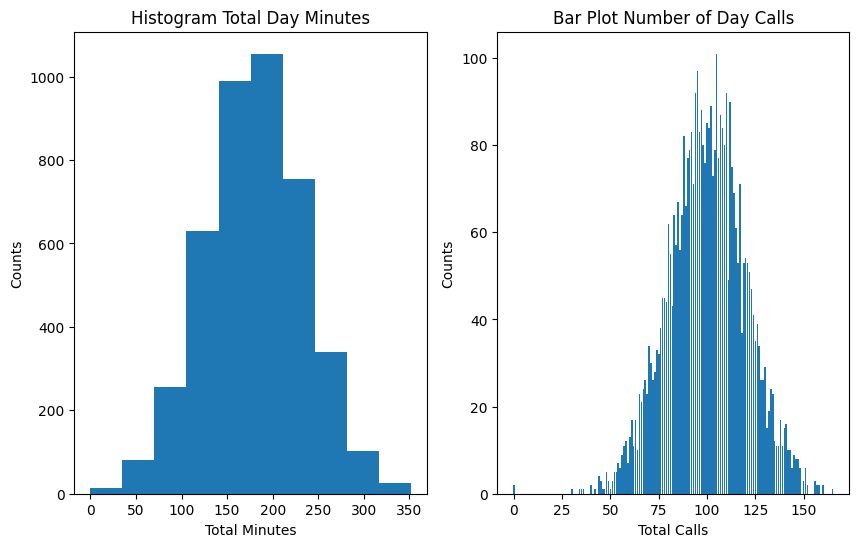

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(10,6))

# describe each graph
ax[0].hist(x=data['total_day_minutes'])
ax[0].set_title('Histogram Total Day Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')

ax[1].bar(x=data['total_day_calls'].value_counts().keys(),
            height=data['total_day_calls'].value_counts().values)
ax[1].set_title('Bar Plot Number of Day Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

*Bar plot* tersebut menunjukkan bahwa mayoritas pengguna melakukan panggilan di pagi hari sebanyak ~100 kali dengan total durasi ~200 menit.

#### **FITUR NIGHT CALLS**

In [ ]:
df_temp = data.loc[:,['total_night_minutes','total_night_calls', 'total_night_charge']]
corr_mtx = df_temp.corr()
corr_mtx

,total_night_minutes,total_night_calls,total_night_charge
total_night_minutes,1.000000,0.023815,0.999999
total_night_calls,0.023815,1.000000,0.023798
total_night_charge,0.999999,0.023798,1.000000


Sama dengan aktivitas *day calls* sebelumnya, `total_night_minutes` dan `total_night_charge` memiliki korelasi sangat tinggi, sedangkan korelasi keduanya dengan variabel `total_night_calls` jauh lebih rendah. Dengan demikian variabel `total_night_charge` juga akan di-*drop*.

Text(0, 0.5, 'Counts')

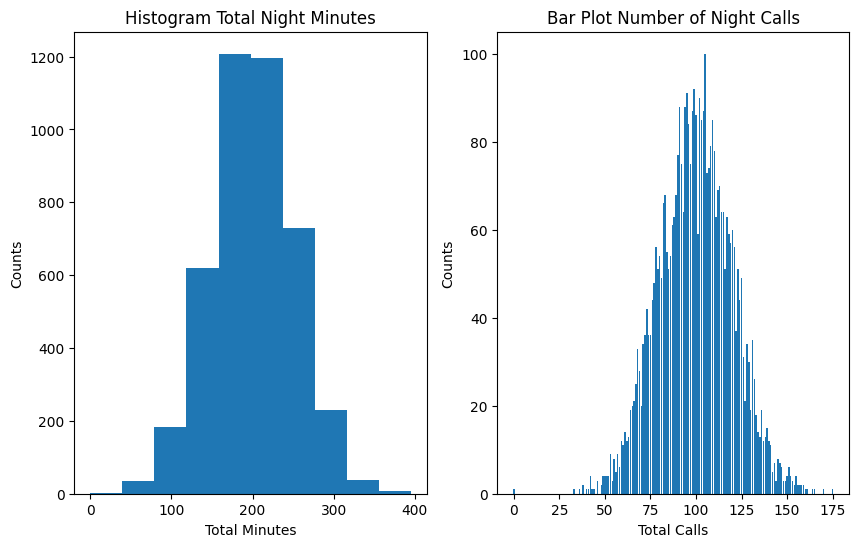

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(10,6))

# describe each graph
ax[0].hist(x=data['total_night_minutes'])
ax[0].set_title('Histogram Total Night Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')

ax[1].bar(x=data['total_night_calls'].value_counts().keys(),
            height=data['total_night_calls'].value_counts().values)
ax[1].set_title('Bar Plot Number of Night Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

Cek *probable outliers* menggunakan fungsi `get_outliers()`

In [ ]:
def get_outliers(df,col):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1

    # find inner fence (cut-off point of non-suspicious data)
    inner_fence_low = q1 - 1.5*iqr
    inner_fence_up = q3 + 1.5*iqr

    # find outer fence (cut-off point of possible outlier)
    outer_fence_low = q1 - 3*iqr
    outer_fence_up = q3 + 3*iqr

    # if between inner-outer fence then possible, else if outside outer fence then probable
    possible_outliers = df[((outer_fence_low <= df[col]) & (df[col] < inner_fence_low)) | ((outer_fence_up >= df[col]) & (df[col] > inner_fence_up))]
    probable_outliers = df[(df[col] < outer_fence_low) | (df[col] > outer_fence_up)]

    return possible_outliers, probable_outliers

In [ ]:
poss, prob = get_outliers(data,'total_night_calls')
prob

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4001,IL,53,area_code_415,no,no,0,214.3,138,36.43,232.2,99,19.74,0.0,0,0.0,8.3,5,2.24,1,no


#### **FITUR EVENING CALLS**

In [ ]:
df_temp = data.loc[:,['total_eve_minutes','total_eve_calls', 'total_eve_charge']]
corr_mtx = df_temp.corr()
corr_mtx

,total_eve_minutes,total_eve_calls,total_eve_charge
total_eve_minutes,1.000000,0.003101,1.00000
total_eve_calls,0.003101,1.000000,0.00312
total_eve_charge,1.000000,0.003120,1.00000


Dari hasil Pearsons Correlation di atas, diambil `total_eve_minutes` dan `total_eve_calls` sebagai variabel penting, sedangkan `total_eve_charge` akan di-*drop*.

Text(0, 0.5, 'Counts')

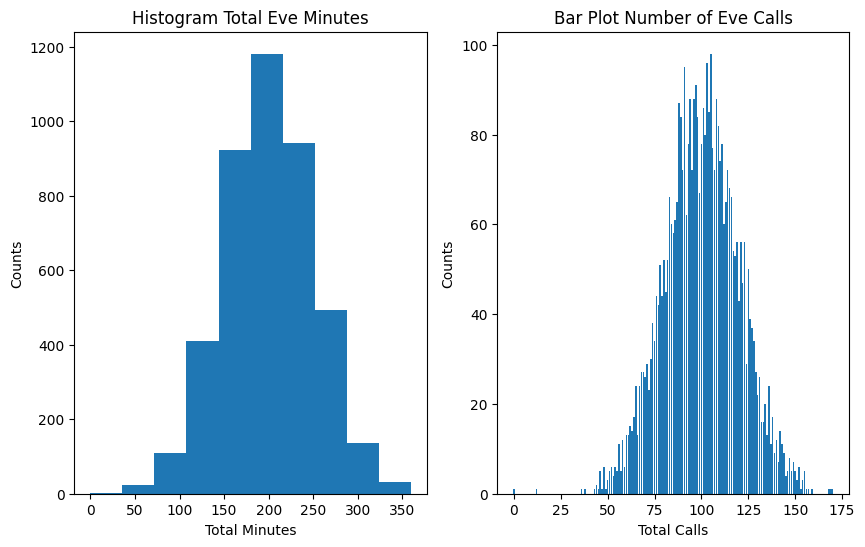

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(10,6))

# describe each graph
ax[0].hist(x=data['total_eve_minutes'])
ax[0].set_title('Histogram Total Eve Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')

ax[1].bar(x=data['total_eve_calls'].value_counts().keys(),
            height=data['total_eve_calls'].value_counts().values)
ax[1].set_title('Bar Plot Number of Eve Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

#### **FITUR INTERNASIONAL CALLS**

Selain *minutes*, *calls*, dan *charge* seperti 3 jenis aktivitas sebelumnya, *international calls* memiliki 1 variabel tambahan, yaitu *international_plan* yang merupakan data kategori biner (*boolean*). Pada analisis *voice mail*, dilihat bahwa *number_vmail_messages* dan *voice_mail_plan* memiliki korelasi tinggi sehingga *voice_mail_plan* saja yang akan digunakan di akhir. Oleh karena itu, di sini dicari korelasi antara `total_intl_minutes`, `total_intl_calls`, `total_intl_charge`, dan `international_plan`.

In [ ]:
df_temp = data.loc[:,['international_plan','total_intl_minutes','total_intl_calls', 'total_intl_charge']]
df_temp['international_plan'] = df_temp['international_plan'].apply(lambda x: 0 if x=='no' else 1)
corr_mtx = df_temp.corr()
corr_mtx

,international_plan,total_intl_minutes,total_intl_calls,total_intl_charge
international_plan,1.000000,0.023815,0.006956,0.023799
total_intl_minutes,0.023815,1.000000,0.019328,0.999993
total_intl_calls,0.006956,0.019328,1.000000,0.019414
total_intl_charge,0.023799,0.999993,0.019414,1.000000


Ternyata, yang memiliki korelasi tinggi hanya  `total_intl_minutes` dan `total_intl_charge` saja. Sama seperti sebelumnya, `total_intl_charge` akan di-*drop* sedangkan yang lain tetap digunakan.

Text(0, 0.5, 'Counts')

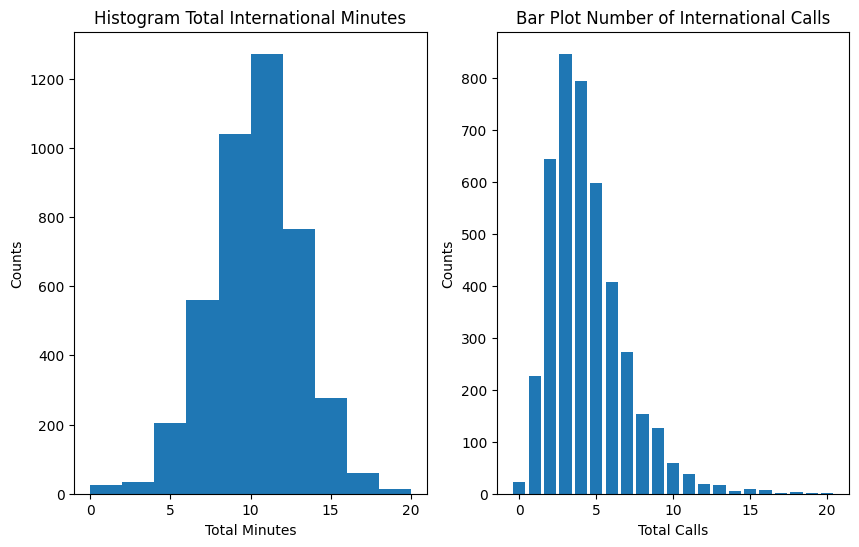

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(10,6))

# describe each graph
ax[0].hist(x=data['total_intl_minutes'])
ax[0].set_title('Histogram Total International Minutes')
ax[0].set_xlabel('Total Minutes')
ax[0].set_ylabel('Counts')

ax[1].bar(x=data['total_intl_calls'].value_counts().keys(),
            height=data['total_intl_calls'].value_counts().values)
ax[1].set_title('Bar Plot Number of International Calls')
ax[1].set_xlabel('Total Calls')
ax[1].set_ylabel('Counts')

#### **FITUR NUMBER CUSTOMER SERVICE CALL**

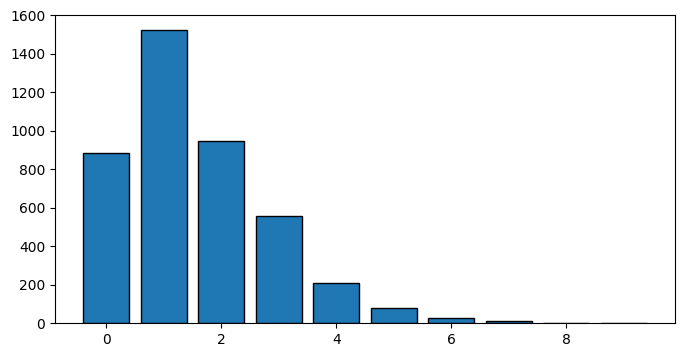

In [ ]:
fig = plt.figure(figsize=(8,4))
_ = plt.bar(height=data['number_customer_service_calls'].value_counts().values,
            x=data['number_customer_service_calls'].value_counts().keys(),ec='black')
plt.show()

Bisa dilihat bahwa walau mayoritas *customer* hanya pernah menghubungi *customer service* 0-2 kali, ada beberapa nilai ekstrim di sisi kanan *bar plot*. Berikut adalah hasil *probable outliers* variabel `number_customer_service_calls`:

### Fitur Kategorikal

In [ ]:
nom_col = ['state','area_code','international_plan','voice_mail_plan','churn']

In [ ]:
data[[c for c in data.columns if c in nom_col]].nunique(axis=0)         # shows numbers of unique values for each category


state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

- Analisis di atas mengkonfirmasi bahwa variabel `international_plan`, `voice_mail_plan`, dan `churn` merupakan tipe kategori biner (*boolean*) dengan *value* yang sudah standar (hanya 'yes' dan 'no'). Pada pembuatan model dan analisis hubungan dengan variabel lain, tipe data ini bisa diperlakukan seperti data ordinal dan akan lebih baik bila di-*convert* ke bentuk angka dengan 1=yes dan 0=no
- `state` memiliki 51 *unique value* sedangkan ada 50 *states* di USA, sehingga perlu diinvestigasi lebih lanjut.
- `area_code` dan `state` harus diubah tipe datanya menjadi kategori (`.astype('category')`) serta harus dicari model dan algoritma yang mampu meng-*handle categorical data*.

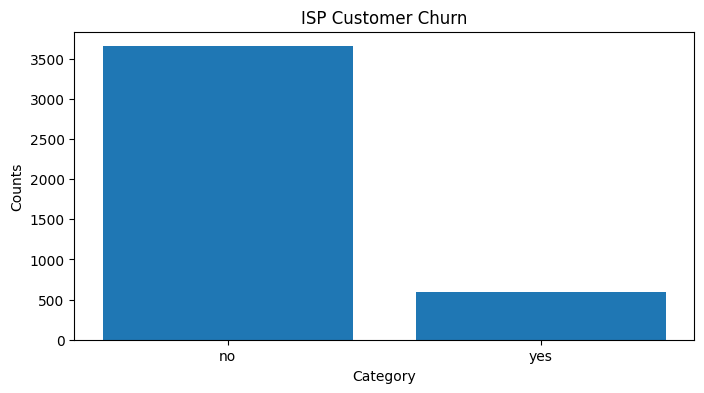

In [ ]:

fig = plt.figure(figsize=(8,4))
plt.bar(x=data['churn'].value_counts().keys(),
            height=data['churn'].value_counts().values)
plt.title('ISP Customer Churn')
plt.ylabel('Counts')
plt.xlabel('Category')
plt.show()

Pada *bar plot*, terlihat bahwa jumlah *customer* yang melanjutkan berlangganan (`churn`='no') jauh lebih banyak daripada yang berhenti. Idealnya, dilakukan teknik seperti *Synthetic Minority Oversampling Technique* (SMOTE) untuk mengatasi *imbalanced classification*, namun pada *challenge* ini dataset *training* akan diterima seadanya dengan asumsi dataset representatif terhadap kondisi populasi.

#### Distribusi Churn

In [ ]:
data["churn"].value_counts(normalize=True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

In [ ]:
data["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

3652 dari 4250 adalah pelanggang setia karena nilainya 0 (no)

#### Distribusi Internasional dan Voice Mail Plan

Text(0, 0.5, 'Counts')

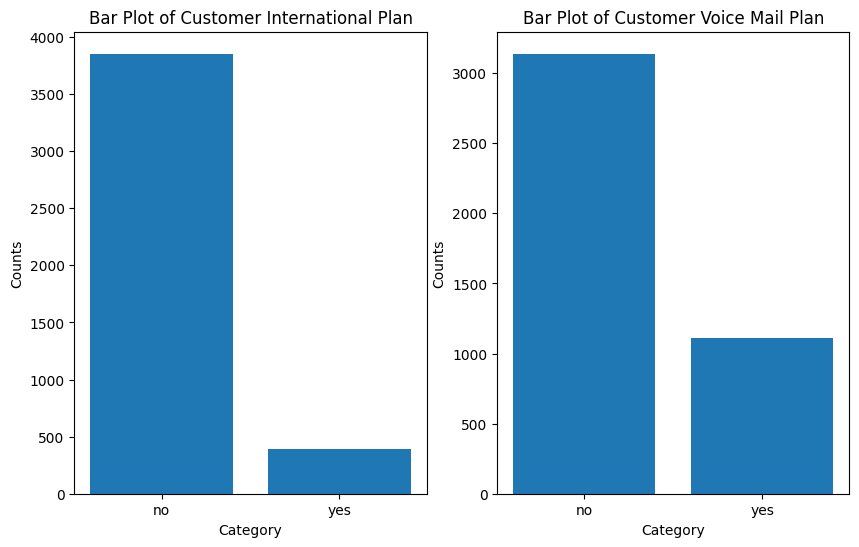

In [ ]:
# create visualization figure for barplot
fig, ax = plt.subplots(ncols=2,figsize=(10,6))

# describe each graph
ax[0].bar(x=data['international_plan'].value_counts().keys(),
            height=data['international_plan'].value_counts().values)
ax[0].set_title('Bar Plot of Customer International Plan')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Counts')

ax[1].bar(x=data['voice_mail_plan'].value_counts().keys(),
            height=data['voice_mail_plan'].value_counts().values)
ax[1].set_title('Bar Plot of Customer Voice Mail Plan')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Counts')

Terlihat bahwa untuk kedua variabel, jauh lebih banyak pelanggan yang masuk ke kategori 'no'. Seberapa berpengaruh keduanya terhadap *churn* dapat dilihat pada analisis hubungan data di bawah.

#### Distribusi State

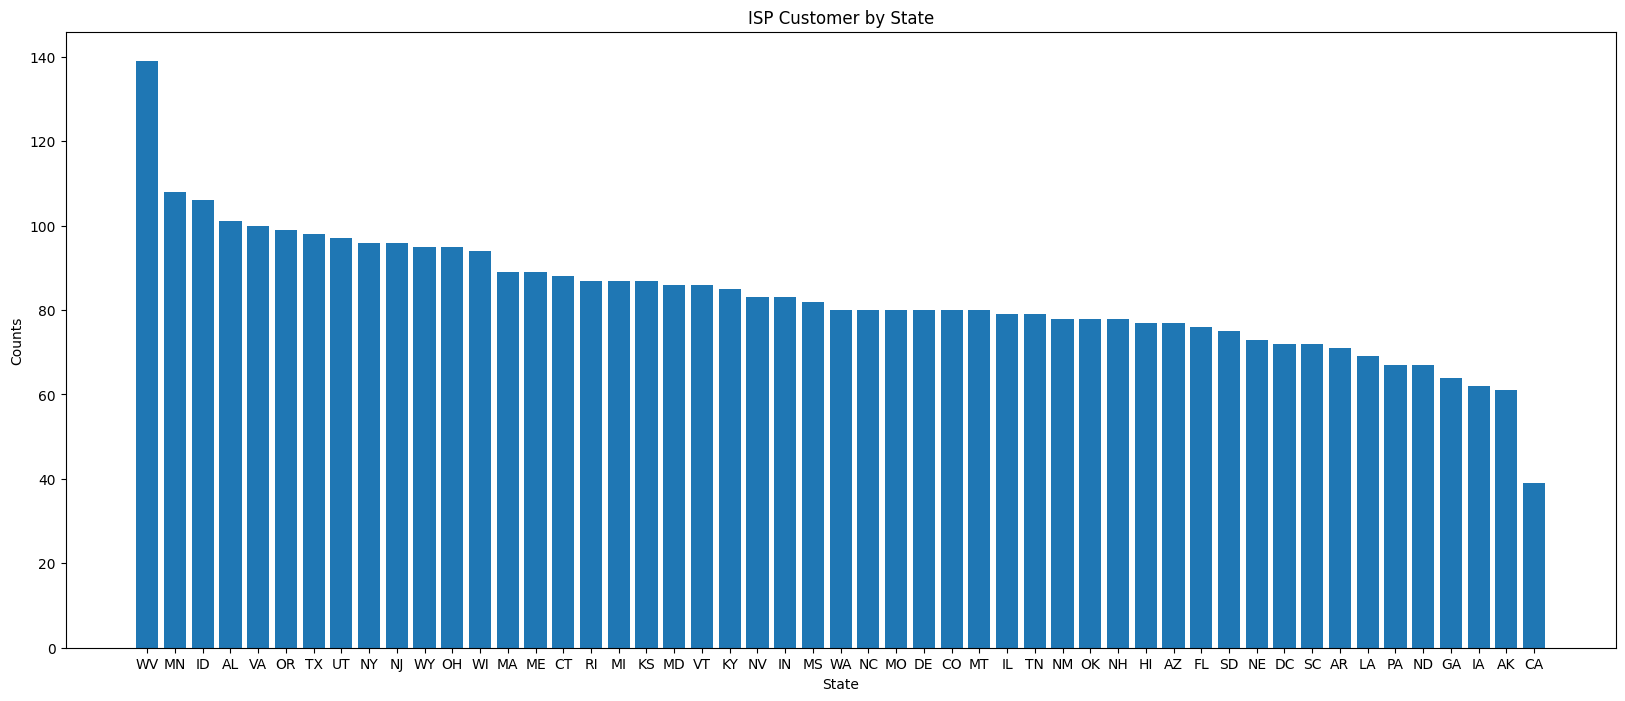

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.bar(x=data['state'].value_counts().keys(),
            height=data['state'].value_counts().values)
plt.title('ISP Customer by State')
plt.ylabel('Counts')
plt.xlabel('State')
plt.show()

Berdasarkan *bar plot* di atas, dapat dilihat bahwa ternyata dataset ini membedakan WA (Washington, negara bagian) dan DC (District of Columbia, ibu kota USA, yang berada di negara bagian lain). Ini tidak terlalu mempengaruhi proses klasifikasi jadi akan dibiarkan saja, namun perlu diingat apabila ingin memvisualisasikan data ke bentuk *geochart*.

#### Distribusi Area Code

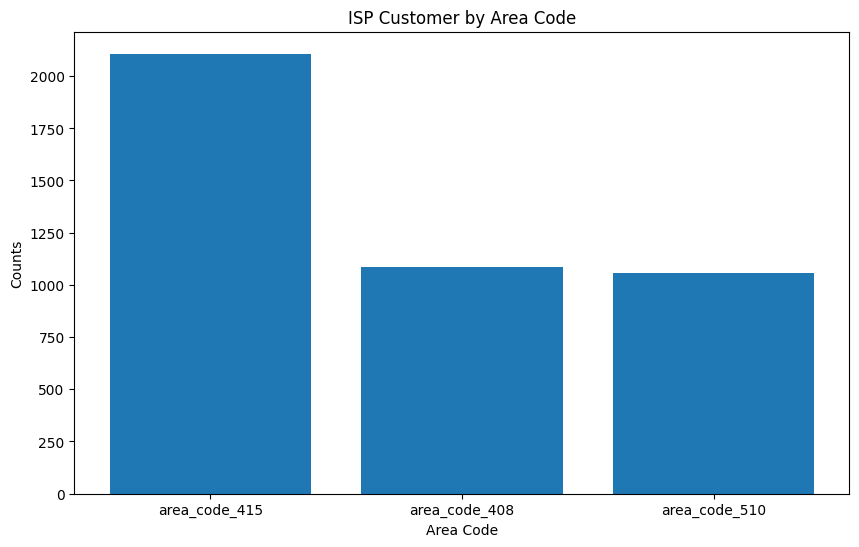

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.bar(x=data['area_code'].value_counts().keys(),
            height=data['area_code'].value_counts().values)
plt.title('ISP Customer by Area Code')
plt.ylabel('Counts')
plt.xlabel('Area Code')
plt.show()

In [ ]:
data[data['area_code']=='area_code_415']['state'].value_counts()

WV    62
ID    59
OR    56
AL    54
VA    54
TX    53
WY    52
NY    51
MN    51
NJ    49
UT    49
VT    47
MI    47
KY    46
OH    46
DE    45
MD    45
KS    45
WI    44
NE    43
RI    43
CT    43
IN    43
AZ    43
TN    42
MT    42
MS    41
IL    41
NV    41
NM    40
DC    40
MO    40
AR    38
MA    38
CO    37
HI    37
ME    36
SC    35
SD    35
FL    34
LA    34
WA    33
NH    32
PA    32
NC    32
AK    31
ND    30
OK    29
GA    25
IA    24
CA    19
Name: state, dtype: int64

## Bivariate Analyst

In [ ]:
# mengkalkulasi rasio dan pivoting
def ratio_with_target(feats):
  ratio_df = data.groupby([feats,'churn']).agg({'account_length':'count'}).reset_index()
  ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.account_length/x.account_length.sum() *100, 0)).values.astype(int)
  ratio_df = ratio_df.pivot_table(index=feats, columns='churn', values='ratio')
  ratio_df = ratio_df.sort_values(by=['yes'], ascending=False)
  return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualisasi
def visualisasi(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    # count
    ax[0].set_title(f'Churn by {judul}\n', fontsize=14)
    sns.countplot(x=fitur, data = data, hue = 'churn', palette = ['silver', 'xkcd:sky blue'] , ax=ax[0])
    ax[0].bar_label(ax[0].containers[0], fontsize=14)
    ax[0].bar_label(ax[0].containers[1], fontsize=14)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')

    #percentage
    ax[1].set_title(f'Ratio of Churn by {judul}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['silver', 'xkcd:sky blue'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2),
                        ha='center', va='center', fontsize=14)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

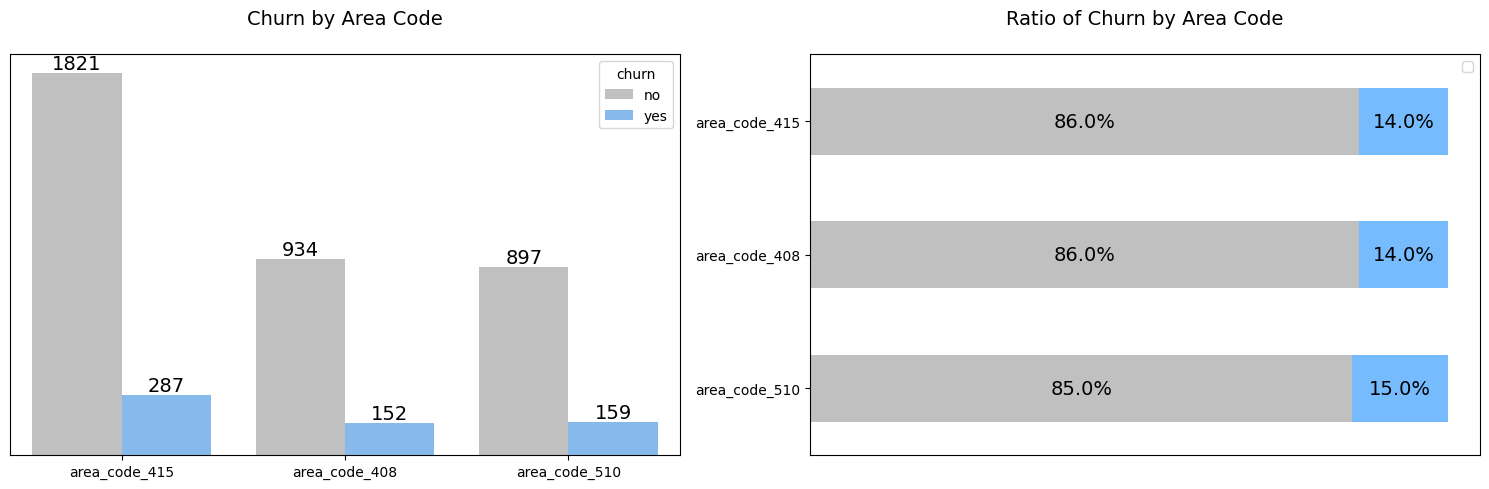

In [ ]:
visualisasi('area_code', 'Area Code')

Key takeaways:
- Mayoritas pelanggan berasal dari Area 415
- Rasio pelanggan yang churn disetiap area tidak jauh berbeda yaitu 14 - 15 %

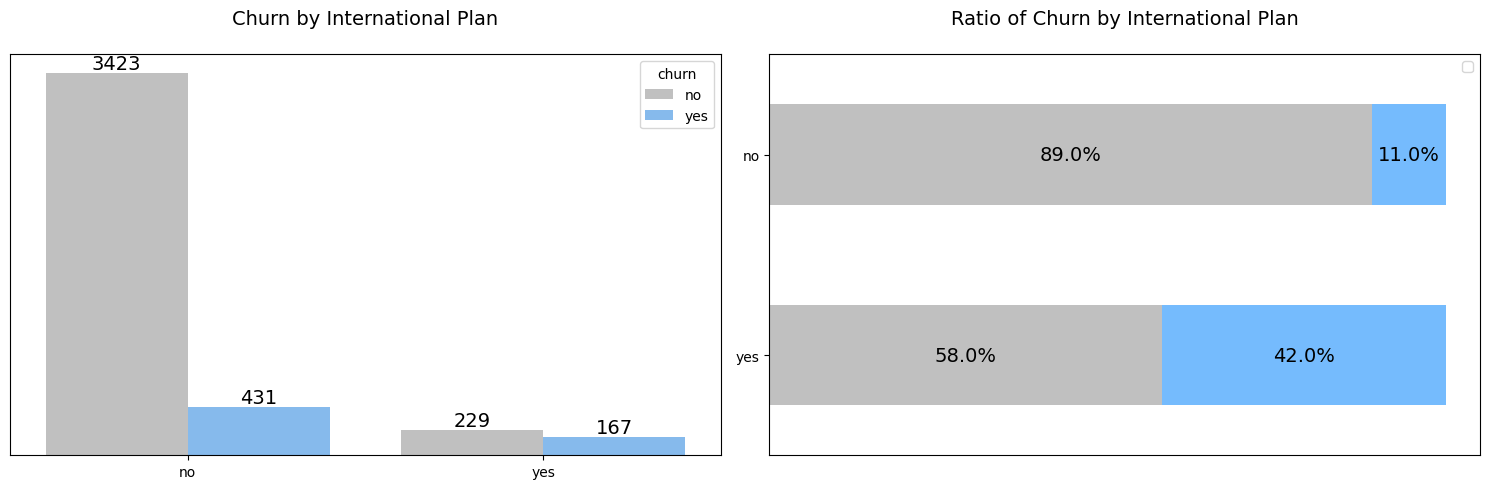

In [ ]:
visualisasi('international_plan', 'International Plan')

Key takeaways:
- Meskipun angka pelanggan yang memiliki International plan cukup rendah, namun 42% nya adalah churn.
- Tingkat churn pada pelanggan yang tidak memiliki International plan hanya sebesar 11%.

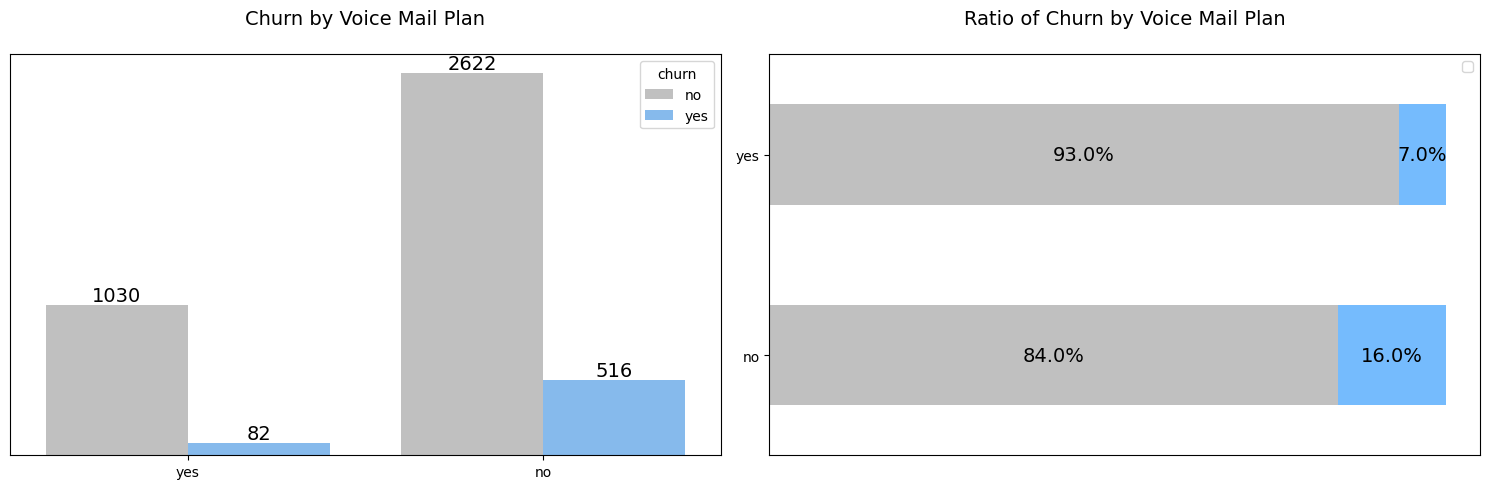

In [ ]:
visualisasi('voice_mail_plan', 'Voice Mail Plan')

Key takeaways:
- Sama halnya, meskipun jumlah pengguna yang memiliki voice mail plan rendah, namun cenderung memiliki tingkat churn paling tinggi yaitu 16% dibandingkan dengan yang tidak memiliki.

## Multivariate Analyst

### *Call In Day*

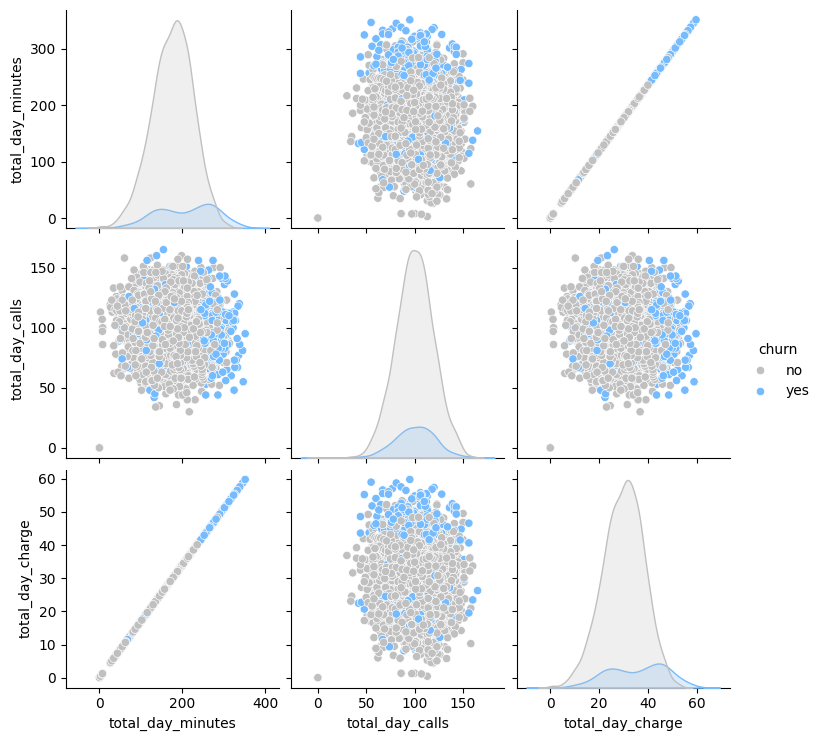

In [ ]:
sns.pairplot(data[['total_day_minutes', 'total_day_calls', 'total_day_charge', 'churn']], hue = 'churn', palette=['silver', 'xkcd:sky blue'])


In [ ]:

print('Average charge per minutes in day call: {:.2f}'.format(data['total_day_charge'].mean()/data['total_day_minutes'].mean()))
print('Average minutes per calls in day call: {:.2f}'.format(data['total_day_minutes'].mean()/data['total_day_calls'].mean()))


Average charge per minutes in day call: 0.17
Average minutes per calls in day call: 1.80


### *Call In Evening*

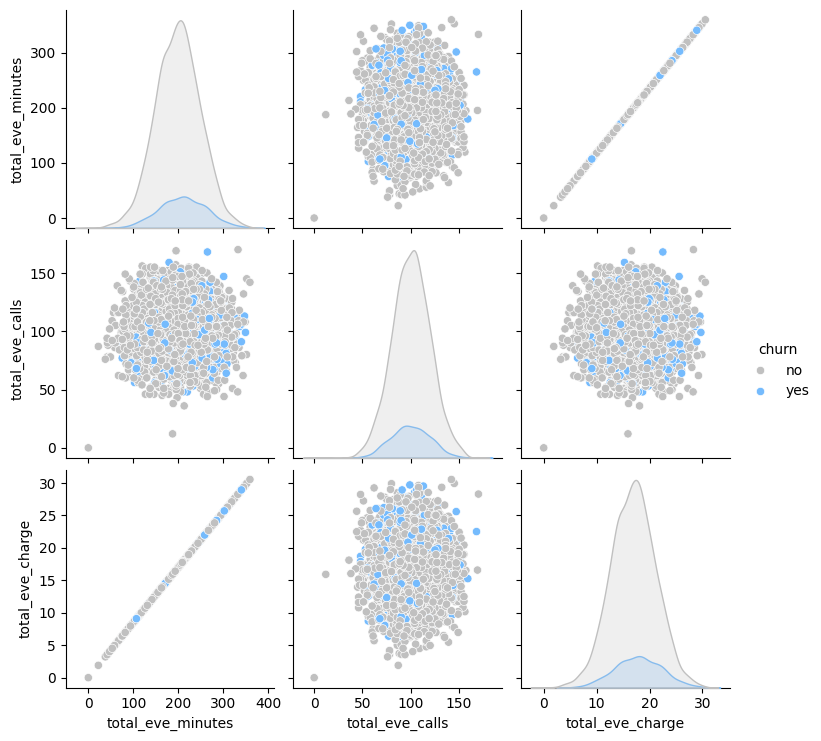

In [ ]:
sns.pairplot(data[['total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'churn']], hue = 'churn', palette=['silver', 'xkcd:sky blue'])


In [ ]:

print('Average charge per minutes in evening call: {:.2f}'.format(data['total_eve_charge'].mean()/data['total_eve_minutes'].mean()))
print('Average minutes per calls in evening call: {:.2f}'.format(data['total_eve_minutes'].mean()/data['total_eve_calls'].mean()))


Average charge per minutes in evening call: 0.09
Average minutes per calls in evening call: 2.00


### *Call In Night*

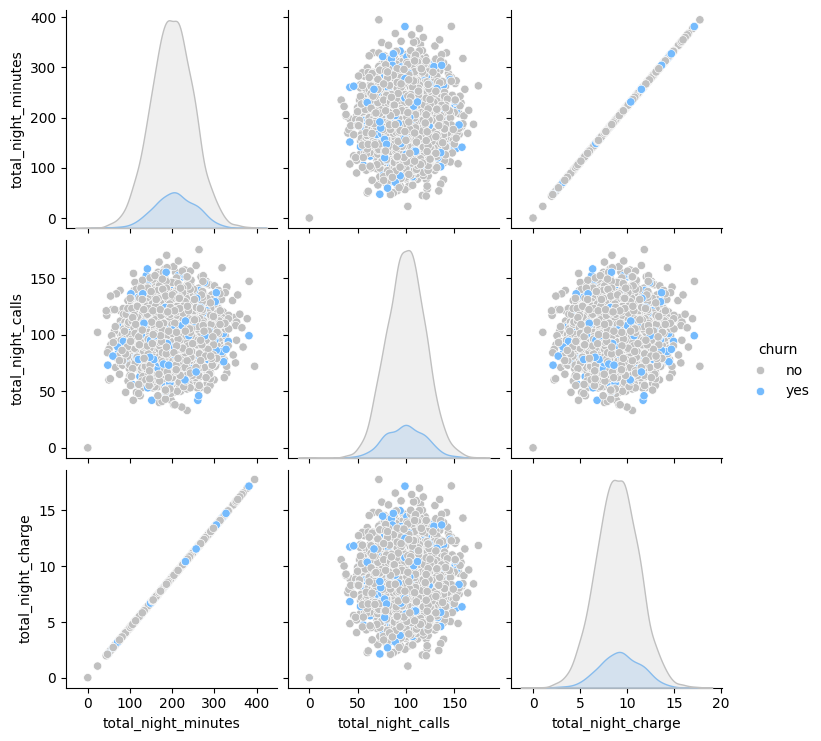

In [ ]:
sns.pairplot(data[['total_night_minutes', 'total_night_calls', 'total_night_charge', 'churn']], hue = 'churn', palette=['silver', 'xkcd:sky blue'])


In [ ]:

print('Average charge per minutes in night call: {:.2f}'.format(data['total_night_charge'].mean()/data['total_night_minutes'].mean()))
print('Average minutes per calls in night call: {:.2f}'.format(data['total_night_minutes'].mean()/data['total_night_calls'].mean()))


Average charge per minutes in night call: 0.05
Average minutes per calls in night call: 2.01


### *International Calls*

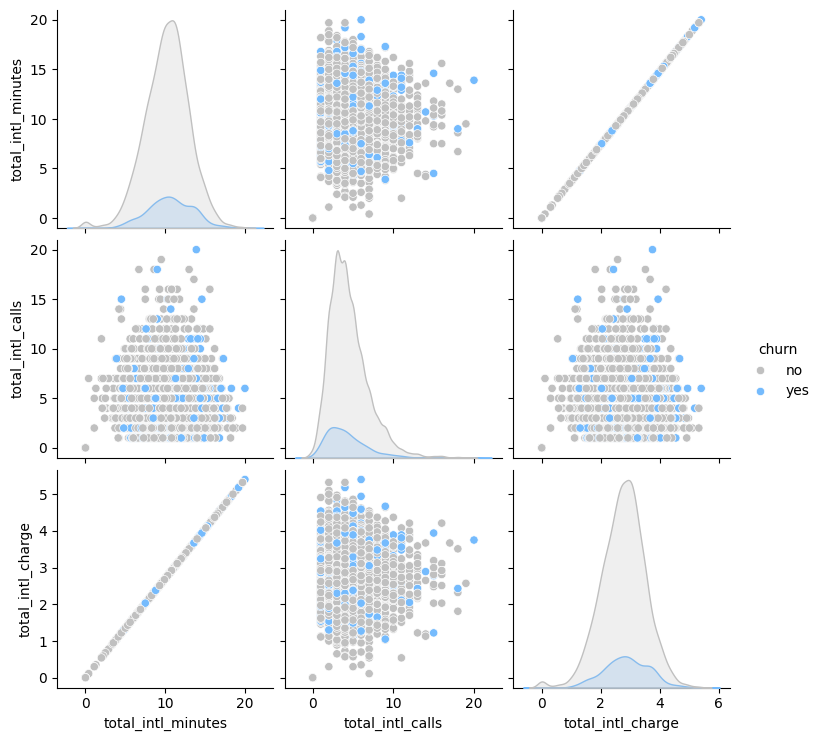

In [ ]:
sns.pairplot(data[['total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn']], hue = 'churn', palette=['silver', 'xkcd:sky blue'])

In [ ]:

print('Average charge per minutes in international call: {:.2f}'.format(data['total_intl_charge'].mean()/data['total_intl_minutes'].mean()))
print('Average minutes per calls in international call: {:.2f}'.format(data['total_intl_minutes'].mean()/data['total_intl_calls'].mean()))


Average charge per minutes in international call: 0.27
Average minutes per calls in international call: 2.32


# Data Prepocessing

### **Handling Outliers**

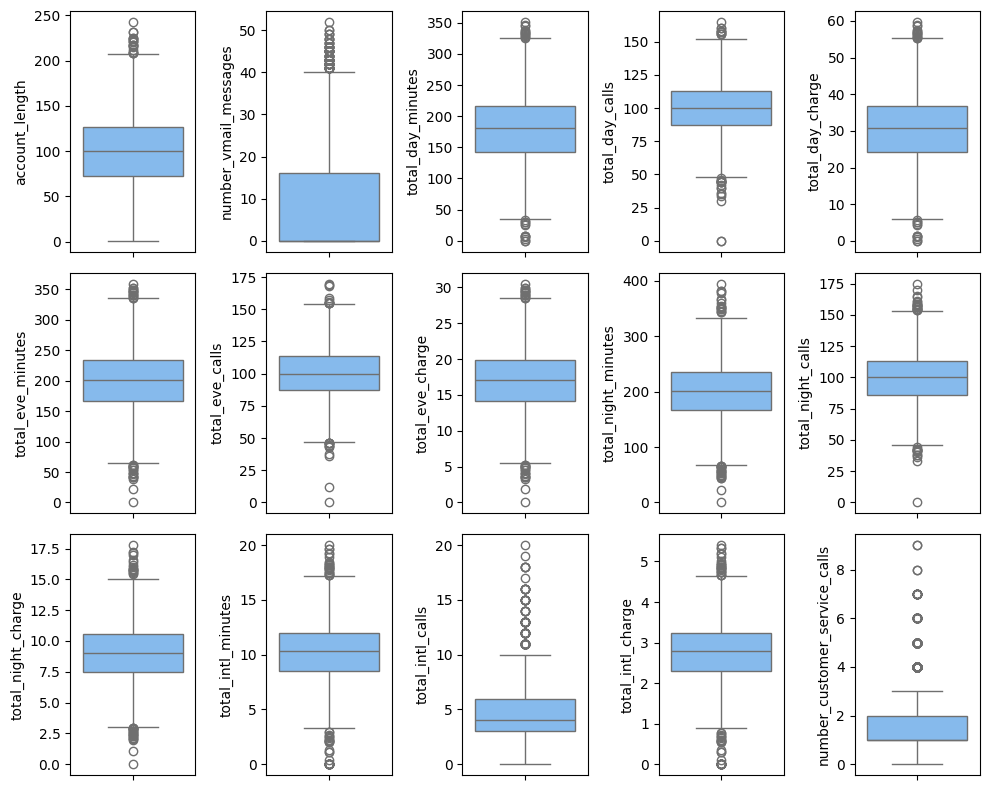

In [ ]:
#cek outlier
plt.figure(figsize=(10, 8))
for i in range (0,len(numeric)):
  plt.subplot(3, 5, i+1)
  num = numeric[i]
  sns.boxplot(y=data[num], color='xkcd:sky blue')
  # plt.figure(figsize=(3,3))
  plt.tight_layout()

Key takeaways:
- Secara keseluruhan, data memiliki outlier namun masih dalam keadaan yang wajar(bukan nilai ekstrim atau anomali yang diduga kesalahan pada pemasukan data)
- Outlier tidak dilakukan handling

### **Features Encoding**

In [ ]:
df_en = data.copy()

In [ ]:
le = LabelEncoder()
# ----------------------
for col in df_en.columns:
    if df_en[col].dtype == 'O':
        df_en[col] = le.fit_transform(df_en[col])

### **Features Selection**

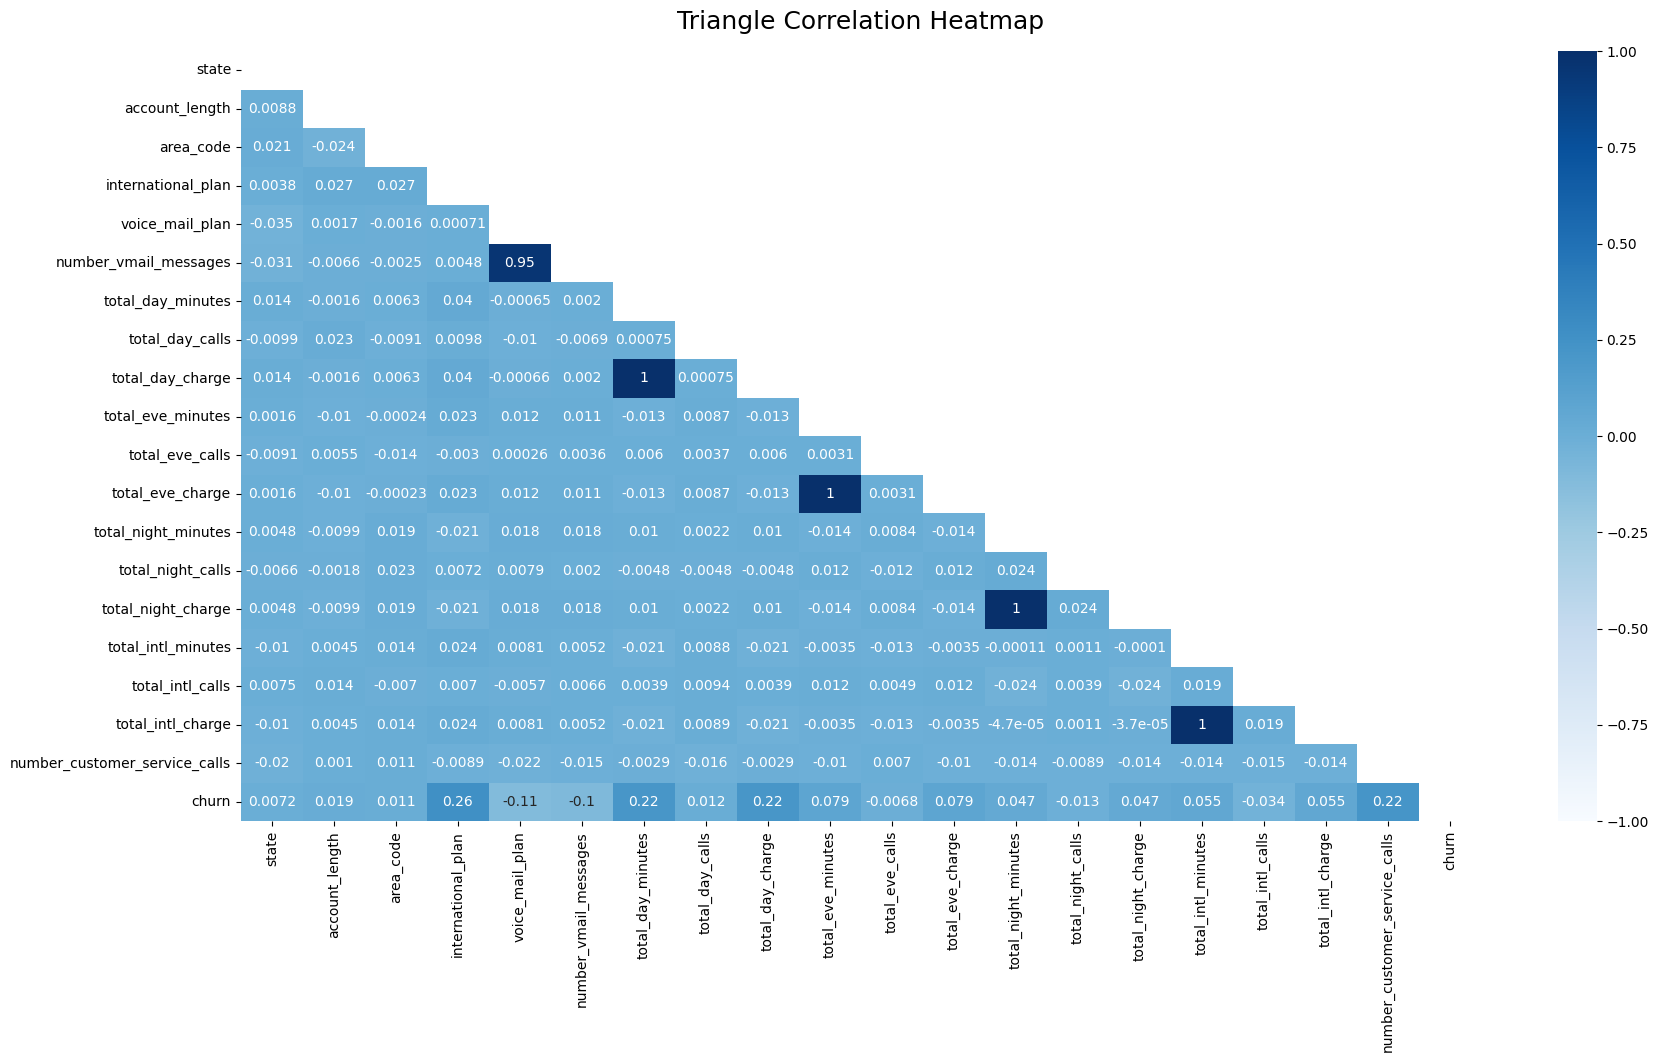

In [ ]:
plt.figure(figsize=(20, 10))
corr_matrix = df_en.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype=np.bool_))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
redundan_feats = ['total_day_minutes','total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'number_vmail_messages', 'state']
df_en.drop(columns=redundan_feats, inplace=True)

In [ ]:
df_en.corr().abs()['churn'].sort_values(ascending=False)

churn                            1.000000
international_plan               0.259053
number_customer_service_calls    0.221220
total_day_charge                 0.215263
voice_mail_plan                  0.114643
total_eve_charge                 0.078852
total_intl_charge                0.055177
total_night_charge               0.046641
total_intl_calls                 0.034334
account_length                   0.019378
total_night_calls                0.012699
total_day_calls                  0.011640
area_code                        0.010696
total_eve_calls                  0.006817
Name: churn, dtype: float64

In [ ]:
df_en.sample(5).T

,1487,3317,462,3071,2574
account_length,115.00,173.00,80.00,96.00,176.00
area_code,2.00,0.00,1.00,1.00,0.00
international_plan,0.00,0.00,0.00,0.00,0.00
voice_mail_plan,1.00,0.00,0.00,0.00,0.00
total_day_calls,86.00,81.00,103.00,102.00,101.00
total_day_charge,32.69,26.28,27.30,21.39,34.32
total_eve_calls,90.00,100.00,109.00,111.00,78.00
total_eve_charge,7.54,12.52,20.15,20.77,13.15
total_night_calls,120.00,99.00,88.00,90.00,79.00
total_night_charge,10.32,5.98,11.03,7.55,7.40


# **Data Modeling**

## Split Train Test

In [ ]:
df_model = df_en.copy()

In [ ]:
X = df_model.drop(columns='churn').copy()
y = df_model['churn'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(2975, 13) (1275, 13)


In [ ]:
y_train.value_counts()

0    2550
1     425
Name: churn, dtype: int64

Fitur target tidak seimbang, dapat menggunakan Kfold pada model

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Modeling

### Define Function

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(X_test)

    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    # Evaluasi model menggunakan classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

# --------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
def c_matrix_viz (model) :
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # set labels for the matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # visualization
    plt.figure(figsize=(5,3))
    sns.set(font_scale=0.8) # for label size
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
                yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# --------------------------------------------------------------------------------
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# --------------------------------------------------------------------------------
from sklearn import metrics
def plot_roc(model, X_test, y_test):
    sns.set_theme(style='whitegrid')
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])

    auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


### **Random Forest**

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', rf_model.mean().round(4))
print('Std:', rf_model.std().round(4))

Recall Mean: 0.6798
Std: 0.0475


#### Hyperparameter Tunning

In [ ]:
params ={'n_estimators': [100, 200, 300],
         'max_depth': [5, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

# -------------------------------------------------------------------------------
model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


#### Predict and Evaluation

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1102
           1       0.70      0.83      0.76       173

    accuracy                           0.93      1275
   macro avg       0.84      0.89      0.86      1275
weighted avg       0.94      0.93      0.93      1275

------------------------------------------------------- 

AUC Test score: 0.9255
AUC Train scores: 0.9419
------------------------------------------------------- 



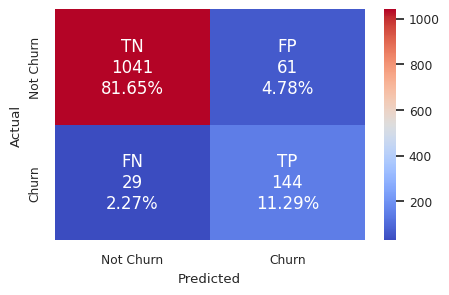

In [ ]:
predict(grid_search)

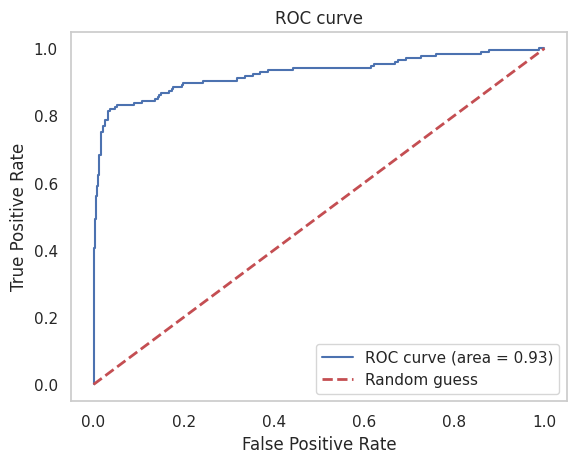

In [ ]:
plot_roc(grid_search, X_test, y_test)

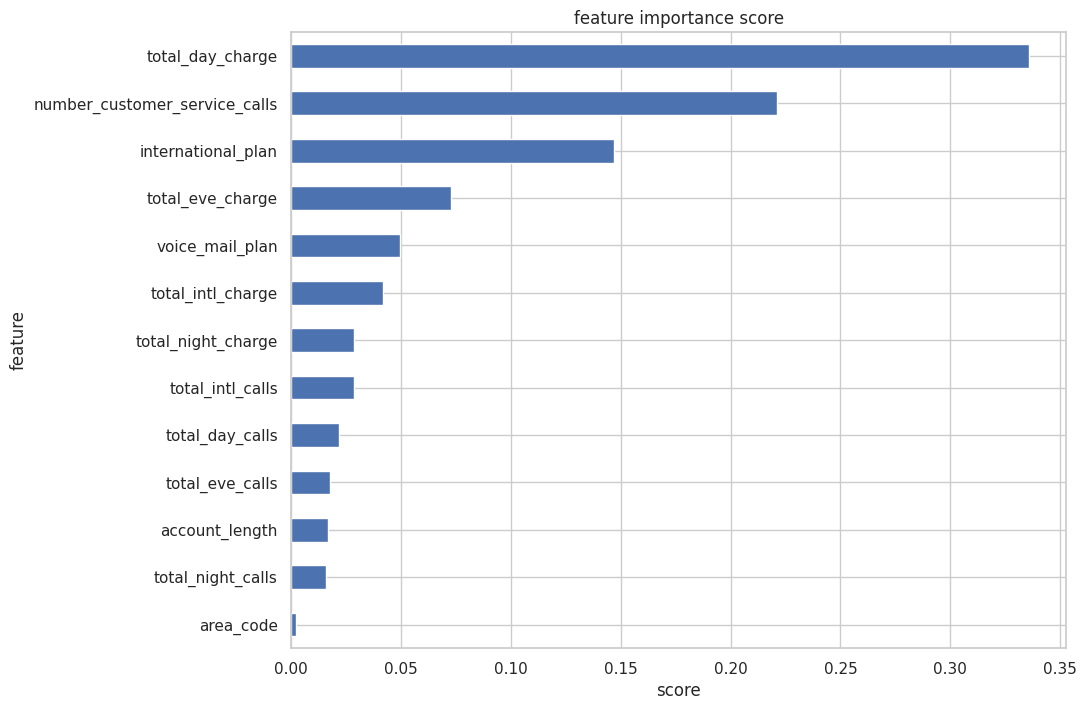

In [ ]:
show_feature_importance(grid_search.best_estimator_)

### **Logistic Regression**

#### Hyperparameter Tunning

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring= 'recall')
print('Recall:', lr_model.mean().round(4))
print('Std:', lr_model.std().round(4))

Recall: 0.7426
Std: 0.0528


#### Predict and Evaluation

In [ ]:
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga'] }

# -------------------------------------------------------------------------------
model = LogisticRegression(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True,random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1102
           1       0.63      0.21      0.32       173

    accuracy                           0.88      1275
   macro avg       0.76      0.60      0.63      1275
weighted avg       0.85      0.88      0.85      1275

------------------------------------------------------- 

AUC Test score: 0.8371
AUC Train scores: 0.8254
------------------------------------------------------- 



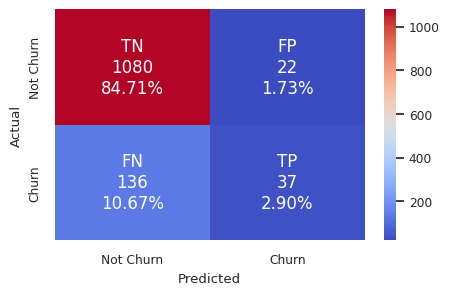

In [ ]:
predict(grid_search)

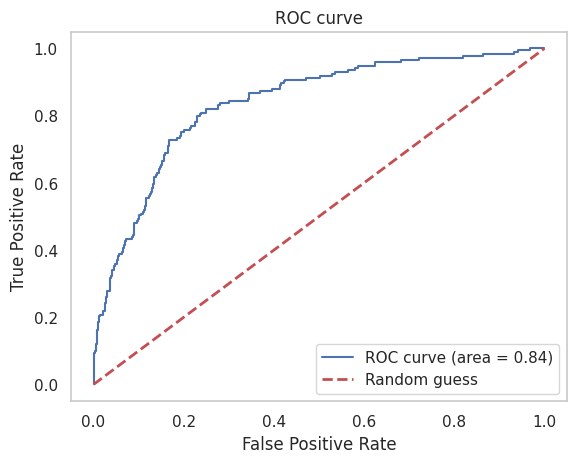

In [ ]:
 plot_roc(grid_search, X_test, y_test)

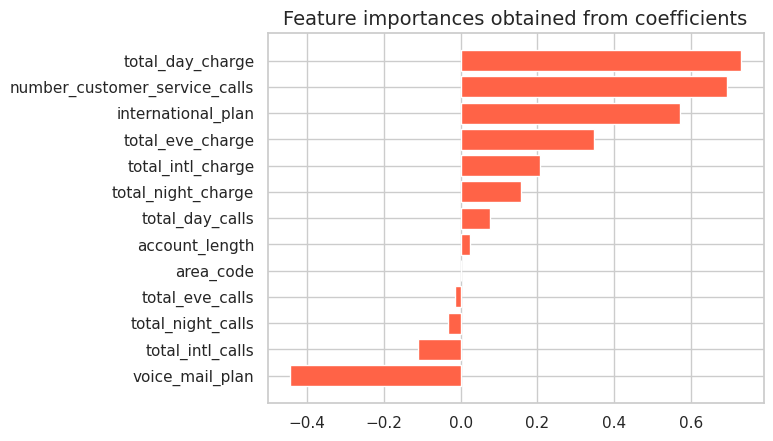

In [ ]:
# dataframe fitur
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=True)

# -----------------------------------------------------------------------
# visualisasi
plt.barh(y=importances['Attribute'], width=importances['Importance'], color='tomato')
plt.title('Feature importances obtained from coefficients', size=14)
plt.show()

## Finalisasi Model

In [ ]:
results = pd.DataFrame([['Logistic Regression', 0.78, 0.84, 0.82],
                       ['Random Forest Classiefier', 0.89, 0.93, 0.94]],
                        columns = ['Models', 'Recall', 'AUC', 'AUC Train'])

results = results.round({'Recall': 2, 'AUC': 2, 'AUC Train': 2})
results = results.sort_values(by=['Recall', 'AUC', 'AUC Train'], ascending=False)
results

,Models,Recall,AUC,AUC Train
1,Random Forest Classiefier,0.89,0.93,0.94
0,Logistic Regression,0.78,0.84,0.82


# Predict Data Test

## Data Test Overview

In [ ]:
data2 = pd.read_csv('Data Test.csv')

In [ ]:
data2.sample(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
35,36,PA,82,area_code_415,no,yes,24,155.2,131,26.38,244.5,106,20.78,122.4,68,5.51,10.7,3,2.89,1
557,558,DC,41,area_code_510,no,no,0,208.0,83,35.36,199.4,110,16.95,173.5,91,7.81,14.9,3,4.02,1
113,114,CT,3,area_code_415,no,yes,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
data2.duplicated().sum()

0

- tidak ada duplikat dan missing value

## Data Test Preparation


In [ ]:
data2.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
feats =['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'total_day_calls', 'total_day_charge', 'total_eve_calls',
        'total_eve_charge', 'total_night_calls', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
X_test1 = data2[feats]

In [ ]:
le = LabelEncoder()
# ----------------------
for col in X_test1.columns:
    if X_test1[col].dtype == 'O':
        X_test1[col] = le.fit_transform(X_test1[col])

In [ ]:
scaler = StandardScaler()
X_test1 = pd.DataFrame(scaler.fit_transform(X_test1), columns=X_test1.columns)

## Predict Data Test


In [ ]:
model_rf = RandomForestClassifier(random_state=42,
                               class_weight='balanced',
                               max_depth = 5,
                               min_samples_leaf = 2,
                               min_samples_split = 10,
                               n_estimators = 300)
model_rf.fit(X_train, y_train)
prediction = model_rf.predict(X_test1)

In [ ]:
df_test1 = pd.read_csv("Data Test.csv")
submission = pd.DataFrame({
        'id': df_test1['id'],
        'churn': prediction
    })
submission.head()

,id,churn
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [ ]:
submission.to_csv('submit.csv', index = False)

In [ ]:
data2['churn'] = submission['churn']
data2.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
data2.to_csv('final.csv', index = False)